In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import os
import pandas as pd
from scipy.optimize import curve_fit

SRIM_Outputs = 'C://Users/dziubins/Desktop/SRIM/SRIM Outputs/'
folder = 'E23508 EffV Trial 5'
file_directory = os.path.abspath(SRIM_Outputs + folder)

def linear(x, m, b):
    return m*x + b

In [4]:
file = file_directory + "\\IONIZ.txt"
strings = open(file).readlines()
del strings[0:79]
for line in range(len(strings)):
    split_ion = strings[line].split()
    strings[line] = [float(p) for p in split_ion]

a = ["Depth", "Ions", "Recoils"]
df = pd.DataFrame(strings,columns=a)
df['Total']=df['Ions']+df['Recoils']

x = df['Depth']
dE = df['Total']

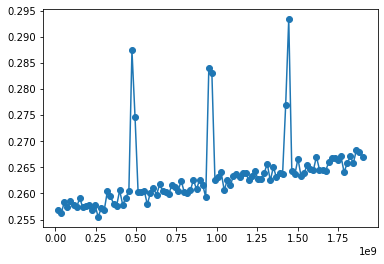

In [5]:
plt.plot(x,dE)
plt.scatter(x,dE)

In [6]:
no_foils = df.iloc[df.index[df['Total'] < 0.27]]
s1 = no_foils.loc[no_foils.index[no_foils['Depth'] < 4.75e8]]
s2 = no_foils.loc[no_foils.index[no_foils['Depth'] < 2*4.75e8]]
s2 = s2.loc[s2.index[s2['Depth'] > 4.75e8]]
s3 = no_foils.loc[no_foils.index[no_foils['Depth'] < 3*4.75e8]]
s3 = s3.loc[s3.index[s3['Depth'] > 2*4.75e8]]
s4 = no_foils.loc[no_foils.index[no_foils['Depth'] < 4*4.75e8]]
s4 = s4.loc[s4.index[s4['Depth'] > 3*4.75e8]]

#print(no_foils.index[no_foils['Depth'] < 4*4.75e8])

In [7]:
initial_guess = [9e-12, 0.25]
params, covariance = curve_fit(linear, no_foils['Depth'], no_foils['Total'], p0=initial_guess)
m_fit, b_fit = params

print(f"Fitted Slope: {m_fit}")
print(f"Fitted Y-Intercept: {b_fit}")

Fitted Slope: 5.31722307137826e-12
Fitted Y-Intercept: 0.2568204206637517


In [8]:
print('Sector 1 Mean dE/dx: ',s1['Total'].mean())
print('Sector 2 Mean dE/dx: ',s2['Total'].mean())
print('Sector 3 Mean dE/dx: ',s3['Total'].mean())
print('Sector 4 Mean dE/dx: ',s4['Total'].mean())

Sector 1 Mean dE/dx:  0.2579933494558333
Sector 2 Mean dE/dx:  0.2606947442839131
Sector 3 Mean dE/dx:  0.2633228127839131
Sector 4 Mean dE/dx:  0.26562856407


In [9]:
fitted = list(m_fit*no_foils['Depth']+b_fit)
no_foils['Fitted'] = fitted

<ipython-input-9-dac51a3e5ef3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_foils['Fitted'] = fitted


In [17]:
no_foils['Depth'] = no_foils['Depth']/1e8

<ipython-input-17-3bd0ef4dbe55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_foils['Depth'] = no_foils['Depth']/1e8


Fit slope:  5.31722307137826e-12 Y-interslope:  0.2568204206637517


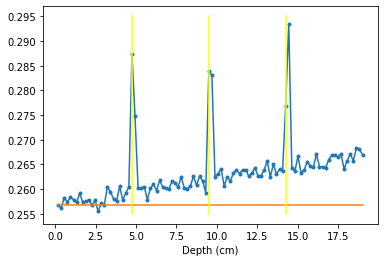

In [22]:
plt.plot(x*1e-8,dE)
plt.scatter(x*1e-8,dE, marker='.')
plt.plot(no_foils['Depth'], m_fit*no_foils['Depth']+b_fit)
plt.plot([4.75,4.75],[0.255,0.295], color='yellow')
plt.plot([2*4.75,2*4.75],[0.255,0.295], color='yellow')
plt.plot([3*4.75,3*4.75],[0.255,0.295], color='yellow')
plt.xlabel("Depth (cm)")
print('Fit slope: ', m_fit, "Y-interslope: ", b_fit)

In [31]:
dx = s1['Depth'][2] - s1['Depth'][1]
print(dx/1e8)
closest_index1 = (no_foils['Fitted'] - s1['Total'].mean()).abs().idxmin()
dE1 = s1['Total'][1:].sum()*dx*1e-6
print(no_foils.iloc[closest_index1, 0]/1e8, dE1)
closest_index2 = (no_foils['Fitted'] - s2['Total'].mean()).abs().idxmin()
dE2 = s2['Total'].sum()*dx*1e-6
print(no_foils.loc[closest_index2, 'Depth']/1e8, dE2)
closest_index3 = (no_foils['Fitted'] - s3['Total'].mean()).abs().idxmin()
dE3 = s3['Total'].sum()*dx*1e-6
print(no_foils.loc[closest_index3, 'Depth']/1e8, dE3)
closest_index4 = (no_foils['Fitted'] - s4['Total'].mean()).abs().idxmin()
dE4 = s4['Total'].sum()*dx*1e-6
print(no_foils.loc[closest_index4, 'Depth']/1e8, dE4)
print(s1['Total'][1:].sum()*dx*1e-6 + s2['Total'].sum()*dx*1e-6 + s3['Total'].sum()*dx*1e-6 + s4['Total'].sum()*dx*1e-6)

0.190002
2.28003 112.7672073878808
7.22008 113.92480244789373
12.1601 115.07328047150882
16.5302 116.08090438998474
457.84619469726806


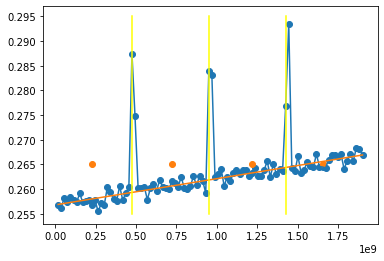

In [11]:
plt.plot(x,dE)
plt.scatter(x,dE)
plt.plot(no_foils['Depth'], m_fit*no_foils['Depth']+b_fit)
plt.plot([4.75e8,4.75e8],[0.255,0.295], color='yellow')
plt.plot([2*4.75e8,2*4.75e8],[0.255,0.295], color='yellow')
plt.plot([3*4.75e8,3*4.75e8],[0.255,0.295], color='yellow')
plt.scatter([2.28003e8,7.22008e8,12.1601e8,16.5302e8], [0.265, 0.265, 0.265, 0.265])

In [12]:
print(no_foils.iloc[closest_index1, 0]/1e8 - (4.75/2))
print(no_foils.iloc[closest_index2, 0]/1e8 - (3*4.75/2))
print(no_foils.iloc[closest_index3, 0]/1e8 - (5*4.75/2))
print(no_foils.iloc[closest_index4, 0]/1e8 - (7*4.75/2))

-0.09497
0.47508000000000017
1.0450999999999997
1.0452000000000012


In [15]:
Q1 = 1.602e-19*3000/(4.75 - no_foils.iloc[closest_index1, 0]/1e8)
Q2 = 1.602e-19*3000/(2*4.75 - no_foils.iloc[closest_index2, 0]/1e8)
Q3 = 1.602e-19*3000/(3*4.75 - no_foils.iloc[closest_index3, 0]/1e8)
Q4 = 1.602e-19*3000/(4*4.75 - no_foils.iloc[closest_index4, 0]/1e8)
print(Q1+Q2+Q3+Q4)

1.1703235667717609e-15


In [16]:
22*0.0097009e-9/(Q1+Q2+Q3+Q4)

182359.65339799196

In [17]:
print(no_foils.iloc[closest_index1, 0]/1e8)

2.28003


In [32]:
top = (4.75 - no_foils.iloc[closest_index1, 0]/1e8)*dE1 + (no_foils.iloc[closest_index2, 0]/1e8 - 4.75)*dE2 + (3*4.75 - no_foils.iloc[closest_index3, 0]/1e8)*dE3 + (no_foils.iloc[closest_index4, 0]/1e8 - 3*4.75)*dE4
correction = top/((495/4)*4.75)
print(correction*2)

3.9239801300116026
